In [20]:
import pandas as pd

df = pd.read_csv("/Users/jianhongxu/python_project/twitter_dataset/cleaned_tweet_10k.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   10000 non-null  object
 1   tweet   10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [2]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 class    0
tweet    0
dtype: int64


In [9]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 34


In [21]:
duplicates = df[df.duplicated()]
print("Duplicate rows based on all columns:\n",duplicates)

Duplicate rows based on all columns:
            class                                              tweet
812         ADHD  death tragedy million deaths statistic deaths ...
3888     BIPOLAR  writings mother bipolar bandit part next manic...
5118     CONTROL  create custom handmade crochet pieces added ba...
5303     CONTROL  role heart health w dr brittany messer pharmd ...
5391     CONTROL  create custom handmade crochet pieces check us...
5467     CONTROL  f humidity percent barometer low f high f rain...
5505     CONTROL  xbt bitmex trollbox stats long contracts short...
5620     CONTROL  pm f humidity percent barometer low f high f p...
5696     CONTROL  kids getting pardons giuliani pardon capitol r...
5754     CONTROL  create custom handmade crochet pieces check us...
5873     CONTROL  xbt bitmex trollbox stats long contracts short...
5884     CONTROL  kids getting pardons giuliani pardon capitol r...
5897     CONTROL  pm f humidity percent barometer low f high f p...
6060     C

In [22]:
duplicates_specific = df[df.duplicated(subset=['tweet'])]
print("Duplicate rows based on 'tweet':\n",duplicates_specific)

Duplicate rows based on 'tweet':
            class                                              tweet
812         ADHD  death tragedy million deaths statistic deaths ...
3888     BIPOLAR  writings mother bipolar bandit part next manic...
5118     CONTROL  create custom handmade crochet pieces added ba...
5303     CONTROL  role heart health w dr brittany messer pharmd ...
5391     CONTROL  create custom handmade crochet pieces check us...
5467     CONTROL  f humidity percent barometer low f high f rain...
5505     CONTROL  xbt bitmex trollbox stats long contracts short...
5620     CONTROL  pm f humidity percent barometer low f high f p...
5696     CONTROL  kids getting pardons giuliani pardon capitol r...
5754     CONTROL  create custom handmade crochet pieces check us...
5873     CONTROL  xbt bitmex trollbox stats long contracts short...
5884     CONTROL  kids getting pardons giuliani pardon capitol r...
5897     CONTROL  pm f humidity percent barometer low f high f p...
6060     CONTR

In [6]:
df['class'].value_counts()

class
ADHD          2500
BIPOLAR       2500
CONTROL       2500
DEPRESSION    2500
Name: count, dtype: int64

In [10]:
df["txt_length"] = df['tweet'].apply(lambda x: len(str(x).split()))

print("Text length statistics:\n", df['txt_length'].describe())

Text length statistics:
 count    10000.000000
mean        16.501000
std          5.404047
min         10.000000
25%         12.000000
50%         15.000000
75%         21.000000
max         29.000000
Name: txt_length, dtype: float64


In [11]:
import re 

df = df[~df['tweet'].str.contains(r'^[^a-zA-Z0-9]+$')]
df = df[~df['tweet'].str.contains(r'http')]

In [12]:
df.shape

(10000, 3)

In [13]:
from collections import Counter

all_words = ' '.join(df['tweet']).split()
word_freq = Counter(all_words)

print("Most common words:", word_freq.most_common(10))
print("Least common words:", word_freq.most_common()[:-11:-1])

Most common words: [('face', 1764), ('im', 1682), ('like', 1536), ('dont', 1123), ('people', 1000), ('get', 958), ('one', 853), ('know', 797), ('amp', 745), ('crying', 703)]
Least common words: [('colorful', 1), ('alsp', 1), ('facehigh', 1), ('burntout', 1), ('facethumbs', 1), ('±', 1), ('blessingspurple', 1), ('livesfull', 1), ('eianampanji', 1), ('bashers', 1)]


In [14]:
print(df.sample(10))

           class                                              tweet  \
8530  DEPRESSION  whats good temperature dab cus im going like b...   
6341     CONTROL  know q started jfk tried exposing deep statece...   
1166        ADHD  possible use dot com domain host ethereum bloc...   
1695        ADHD  group project partner one classes wrote entire...   
4957     BIPOLAR  religious christian boarding school th birthda...   
6843     CONTROL  definitely one better takes damn man christian...   
3674     BIPOLAR  mood feel like got suit another maker wouldnt ...   
8579  DEPRESSION  help us serve better want hear yes take quick ...   
6191     CONTROL  rt cognizant specific need talent role came us...   
4114     BIPOLAR  science behaving sexuality exact science nothi...   

      txt_length  
8530          11  
6341          20  
1166          10  
1695          27  
4957          18  
6843          12  
3674          18  
8579          20  
6191          11  
4114          16  


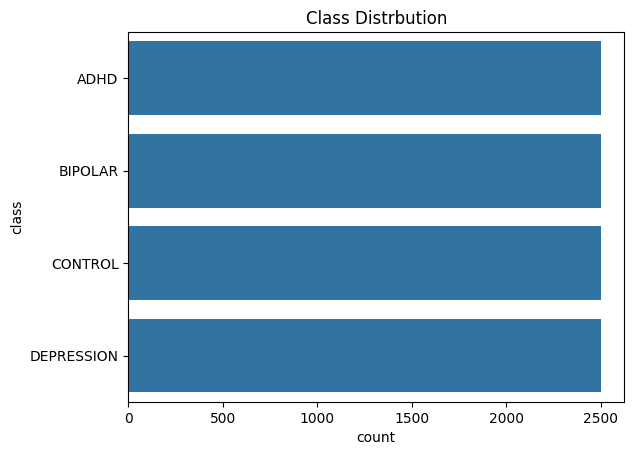

In [17]:
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns
sns.countplot(df['class'])
plt.title("Class Distrbution")
plt.show()

